Intro:

This code is an example of clustering analysis using the Iris dataset. 
The Iris dataset contains 150 samples of iris flowers, each with four features: 
sepal length, sepal width, petal length, and petal width. 
The objective of this analysis is to perform K-means clustering to group these samples 
into clusters based on their features, without considering their species labels.

The Iris dataset, in particular, is interesting because:
1. This set contains multiple measurements and this is good example in clustering problem.
2. Real-world Relevance: this dataset is a good representation of real-world data.




The Iris dataset can be found at the UCI Machine Learning Repository:
    https://archive.ics.uci.edu/ml/datasets/iris.


In [1]:
from IPython.display import Image, display

# URL of Iris flower image
image_urls ='https://th.bing.com/th/id/R.243c9ddfc6b7aa53eb851376429e5e28?rik=XIuYKeU3EZQ6Qw&pid=ImgRaw&r=0'

# Display image
print("If you don't know, this is the Iris flower/زهرة السوسن.")
display(Image(url=image_urls, width=200, height=200))

If you don't know, this is the Iris flower/زهرة السوسن.


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [3]:
# Data Preprocessing

iris = load_iris()                    # Load Iris Dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)   # Create a DataFrame 'iris_df' 

In [4]:
print(f"Original data points: {iris_df.shape[0]}")

Original data points: 150


In [5]:
# Display the first few rows of the original dataset
print("original dataset:")
pd.DataFrame(iris_df).head()

original dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Scaling:

Here I perform Min-Max normalization to ensure that all features fall within the same range, preventing any one 
feature from dominating. So that each feature contributes equally to the distance calculations.

In [6]:
# Scaling the data(scaled for normalize the feature values)
scaler = MinMaxScaler()    # Initialize the MinMaxScaler
iris_scaled = scaler.fit_transform(iris_df)     # Scale the data using the fitted scaler

In [7]:
# Display the first few rows of the scaled data
print("Scaled Data:")
pd.DataFrame(iris_scaled, columns=iris.feature_names).head()

Scaled Data:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


C:\Users\Alaa_Abdallah\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alaa_Abdallah\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alaa_Abdallah\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alaa_Abdallah\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

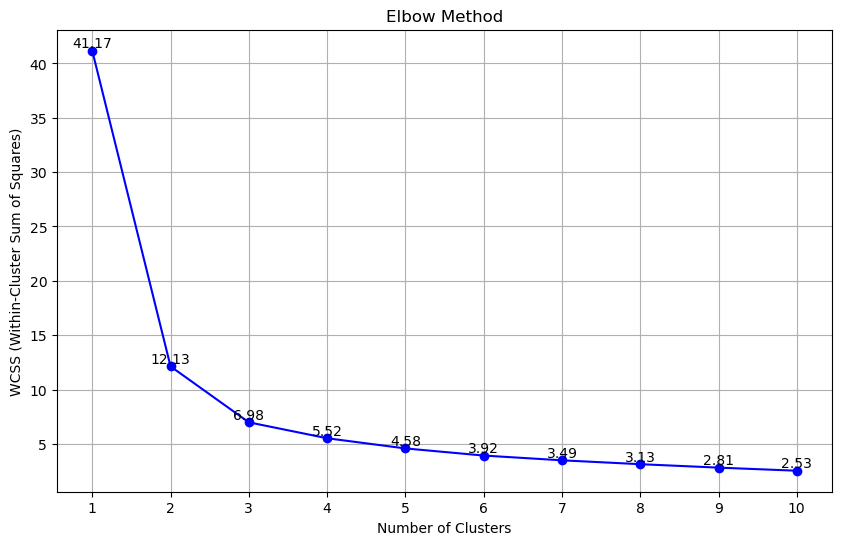

In [8]:
# Determining the Number of Clusters (using Elbow Method)
wcss = []

# Iterate over different numbers of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)  # Initialize KMeans with 'i' clusters
    kmeans.fit(iris_scaled)  # Fit KMeans to the scaled data
    wcss.append(kmeans.inertia_)  

# Plot the results   
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')

# Annotate each point with its WCSS value
for i, value in enumerate(wcss, start=1):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In this chart, shows that the “elbow” is located at 3 clusters. 
This is where the WCSS drops sharply and then begins to stabilize, suggesting that adding more clusters after this point results in diminishing returns in terms of reducing the WCSS.

Therefore, based on the elbow and histogram method, I chose 3 clusters as the optimal number of clusters for K-means clustering.

In [9]:
# Based on the elbow method, I choose 3 clusters

#The K-means algorithm is applied to partition the dataset into clusters
# Model Training
kmeans = KMeans(n_clusters=3, random_state=42)         # Initialize KMeans with 3 clusters
kmeans.fit(iris_scaled)              # Fit KMeans to the scaled data

C:\Users\Alaa_Abdallah\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alaa_Abdallah\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [10]:
# Display a few rows of data with cluster labels
iris_df['Cluster'] = kmeans.labels_
iris_df.head(120)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
115,6.4,3.2,5.3,2.3,0
116,6.5,3.0,5.5,1.8,0
117,7.7,3.8,6.7,2.2,0
118,7.7,2.6,6.9,2.3,0


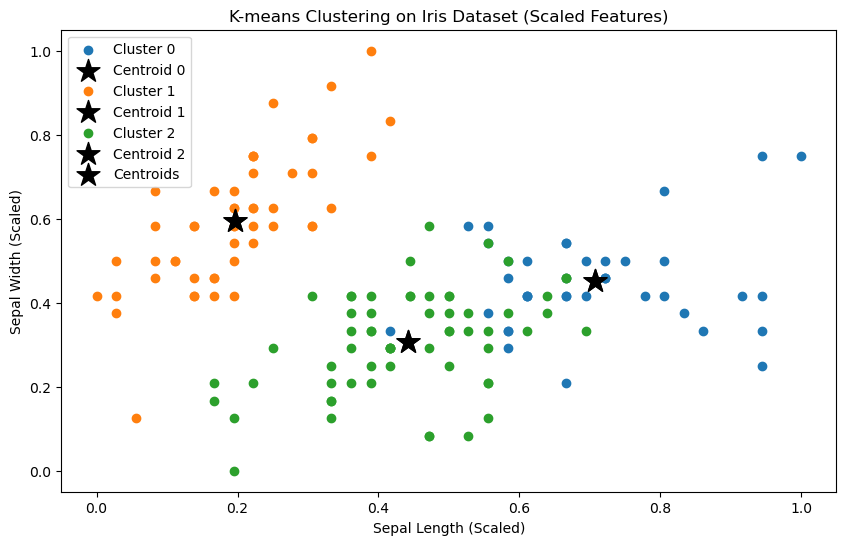

In [11]:
# Results(Visualization)
centroids = kmeans.cluster_centers_            # Extract cluster centroids
labels = kmeans.labels_         # Extract cluster labels

# Plotting
plt.figure(figsize=(10, 6))
for i in range(len(centroids)):
    # plot for data points in each cluster
    plt.scatter(iris_scaled[labels == i, 0], iris_scaled[labels == i, 1], label=f'Cluster {i}')
    # Plotting centroids
    plt.scatter(centroids[i, 0], centroids[i, 1], s=300, marker='*', label=f'Centroid {i}', c='black')
    
# Plotting all centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, marker='*', c='black', label='Centroids')
plt.xlabel('Sepal Length (Scaled)')
plt.ylabel('Sepal Width (Scaled)')
plt.title('K-means Clustering on Iris Dataset (Scaled Features)')
plt.legend()
plt.show()

The data points are divided into three clusters: Cluster 0 (blue), Cluster 1 (orange), and Cluster 2 (green). 
And the centroids of these clusters are marked with black stars.

Cluster Distribution:
1. Cluster 0 (Blue): The blue cluster appears on the right side of the plot. It contains points that have a
higher scaled Sepal Length and a moderate range of scaled Sepal Widths.
2. Cluster 1 (Orange): The orange cluster is situated mostly in the upper-left part of the plot. 
This cluster includes points with lower Sepal Lengths and a wide range of Sepal Widths.
3. Cluster 2 (Green): The green cluster occupies the lower-central part of the plot. 
It contains points with lower Sepal Widths and a moderate range of Sepal Lengths.

Interpreting Overlap:

There is some overlap between the clusters, especially between Cluster 0 and Cluster 2. 
This indicate similarities in these groups or the presence of intermediate species characteristics.


After I did my research on this dataset, I noticed that Fisher compiled a dataset that contained two clusters with a fairly clear separation. One cluster contains Iris setosa, while the other contains both Iris virginica and Iris versicolor. For this reason there is overlap, however I have separated these two groups.

This makes the dataset a good example of the use of data mining techniques.

In [12]:
# Evaluation

#Silhouette Score measures how similar each point is to its own 
#cluster compared to other clusters.

silhouette_avg = silhouette_score(iris_scaled, labels)    # Calculate silhouette score
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5047687565398589


Silhouette Score: 0.50478        ==> this is positive Score 

A score of 0.50478 indicates that the clusters are reasonably well-defined.
Points are, on average, closer to their own cluster centroids than to centroids of other clusters.

There may be some overlap or ambiguity in cluster boundaries, which is common in real-world data,and for the reason I explained previously.

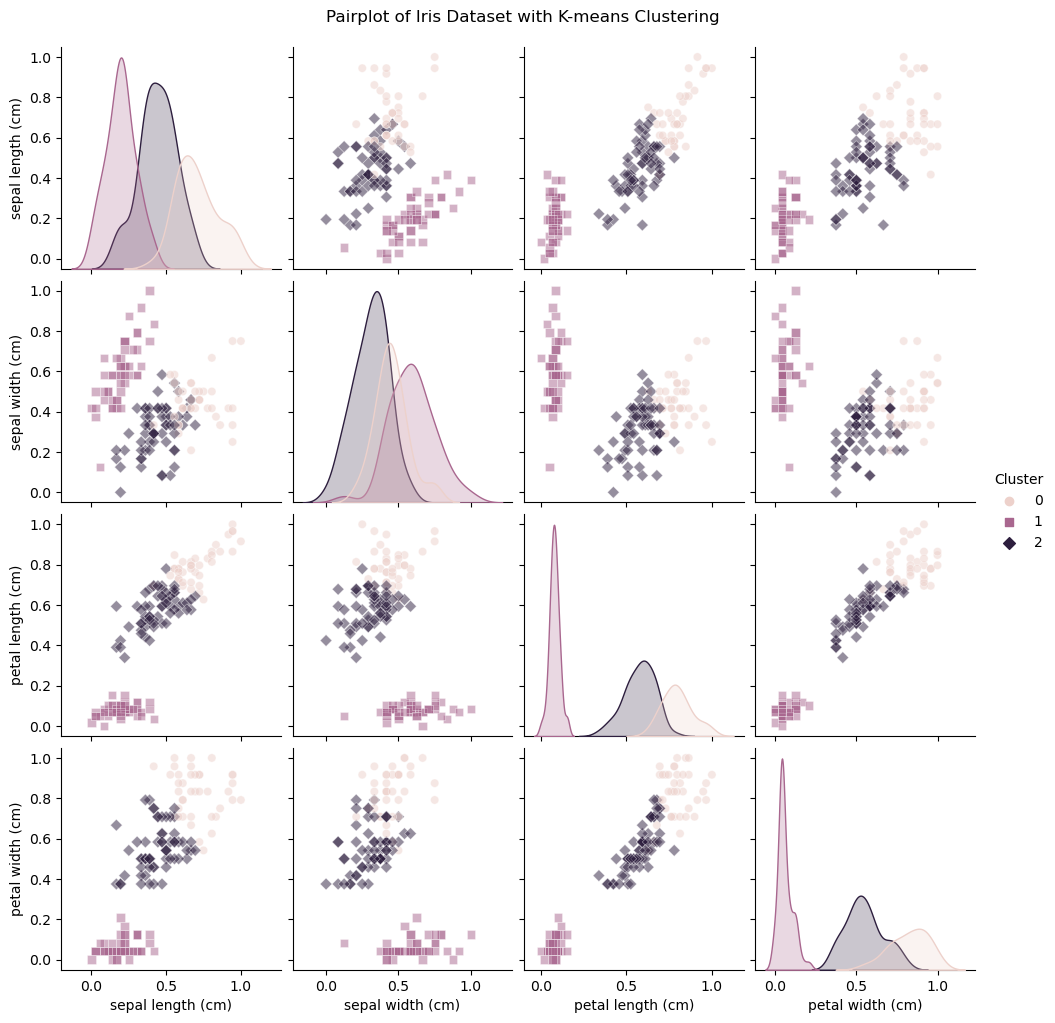

In [15]:
# import seaborn as sns
import pandas as pd

# Create a DataFrame with scaled features and labels
iris_scaled_df = pd.DataFrame(iris_scaled, columns=iris.feature_names)
iris_scaled_df['Cluster'] = labels

# Use seaborn to create a pairplot
sns.pairplot(iris_scaled_df, hue='Cluster', markers=['o', 's', 'D'], plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Iris Dataset with K-means Clustering', y=1.02)
plt.show()